In [222]:
from fastai.vision.all import (untar_data,
                               URLs,
                               ImageDataLoaders,
                               Image,
                               show_image,
                               to_np)

import numpy as np
import torch
import pandas as pd

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
(path/'train').ls()

(#2) [Path('/Users/fabiofujii/.fastai/data/mnist_sample/train/7'),Path('/Users/fabiofujii/.fastai/data/mnist_sample/train/3')]

In [4]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [5]:
im3_path = threes[0]
im3 = Image.open(im3_path)
im3

In [6]:
np.array(im3)[4:10,4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [9]:
torch.tensor(np.array(im3))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219,
         166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254,
         254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [11]:
im3_t = torch.tensor(np.array(im3))
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font_size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0
1,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0
2,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0
3,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0
4,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0
5,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0
6,0,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0,0
7,0,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0,0
8,0,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0,0
9,0,0,0,0,0,0,81,247,254,254,254,254,254,254,146,0,0,0


In [13]:
threes_tensors = [torch.tensor(np.array(Image.open(im_path))) for im_path in threes]
sevens_tensors = [torch.tensor(np.array(Image.open(im_path))) for im_path in sevens]

In [16]:
len(threes_tensors), len(sevens_tensors)

(6131, 6265)

<AxesSubplot:>

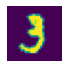

In [18]:
show_image(threes_tensors[0])

In [65]:
stacked_threes = torch.stack(threes_tensors).float()/255
stacked_sevens = torch.stack(sevens_tensors).float()/255

stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

# baseline

Similarity: distance from the average pixels of each number

(<AxesSubplot:>, <AxesSubplot:>)

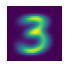

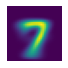

In [66]:
# getting the average of threes
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3), show_image(mean7)

(<AxesSubplot:>, <AxesSubplot:>)

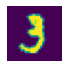

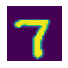

In [67]:
# getting a random num
a_3 = stacked_threes[0]
a_7 = stacked_sevens[0]
show_image(a_3), show_image(a_7)

<AxesSubplot:>

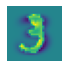

In [56]:
diff3 = a_3 - mean3
show_image(diff3)

L1

* l1 norm -> (abs(x1 - x2) + abs(y1 + y2))/2 mean absolute difference (error)
* dist l1 -> abs(x1 - x2) + abs(y1 + y2) manhattan distance

L2

* l2 norm -> sqrt((x1 - x2)ˆ2 + (y1 - y2)ˆ2)/2 # root mean squared difference (error)
* dist l2 -> sqrt((x1 - x2)ˆ2 + (y1 - y2)ˆ2) # euclidean distance 

In [70]:
# calculating the L1 norm and l2 Norm
print('l1 norm')
print((mean3 - a_3).abs().mean())

print('l2 norm')
print(((mean3 - a_3)**2).mean().sqrt())

l1 norm
tensor(0.1074)
l2 norm
tensor(0.1912)


In [81]:
# we can also use the l1 loss from pytorch itself
import torch.nn.functional as F

F.l1_loss(input=a_3, target=mean3), F.mse_loss(input=a_3, target=mean3).sqrt()

(tensor(0.1074), tensor(0.1912))

In [58]:
# distance of a number 3 from the mean of number 3 and number 7
print('number 3')
print('L1 norm')
print('dist from mean3: {}  dist from mean7: {}'.format(torch.dist(mean3, a_3, p=1), torch.dist(mean7, a_3, p=1)))

print('L2 norm')
print('dist from mean3: {}  dist from mean7: {}'.format(torch.dist(mean3, a_3), torch.dist(mean7, a_3)))

number 3
L1 norm
dist from mean3: 84.21893310546875  dist from mean7: 113.00668334960938
L2 norm
dist from mean3: 5.353653907775879  dist from mean7: 7.78529167175293


In [59]:
# distance of a number 3 from the mean of number 3 and number 7
print('number 7')
print('L1 norm')
print('dist from mean3: {}  dist from mean7: {}'.format(torch.dist(mean3, a_7, p=1), torch.dist(mean7, a_7, p=1)))

print('L2 norm')
print('dist from mean3: {}  dist from mean7: {}'.format(torch.dist(mean3, a_7), torch.dist(mean7, a_7)))

number 7
L1 norm
dist from mean3: 134.49807739257812  dist from mean7: 85.87838745117188
L2 norm
dist from mean3: 8.485733032226562  dist from mean7: 6.1479692459106445


In [92]:
torch.concat([a,b])

tensor([1., 1., 2., 2.])

In [96]:
a = torch.tensor([1,2])

In [97]:
a.argmax()

tensor(1)

In [145]:
# creating the baseline model

def mae(a,b):
    return (a-b).abs().mean()

# binary classification with 0 = '3' and 1 = '7'
def baseline_classifier(im):
    mae_t = torch.tensor([mae(im, mean3), mae(im, mean7)])
    return mae_t.argmin()

In [158]:
valid_3_tensor = torch.stack([torch.tensor(np.array(Image.open(im)))/255 for im in (path/'valid'/'3').ls()])
valid_7_tensor = torch.stack([torch.tensor(np.array(Image.open(im)))/255 for im in (path/'valid'/'7').ls()])

In [159]:
valid_3_tensor.shape, valid_7_tensor.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [160]:
result3 = torch.stack([baseline_classifier(im) for im in valid_3_tensor])
result7 = torch.stack([baseline_classifier(im) for im in valid_7_tensor])

In [161]:
print('accuracy on number 3: {}'.format((result3 == 0).float().mean()))
print('accuracy on number 7: {}'.format((result7 == 1).float().mean()))

accuracy on number 3: 0.9168316721916199
accuracy on number 7: 0.9854085445404053


In [162]:
result_overall = torch.concat(((result3 == 0).float(), (result7 == 1).float()))
print('overall result: {}'.format(result_overall.mean()))

overall result: 0.9514229893684387


In [166]:
def broadcast_mae(a, b):
    return (a-b).abs().mean((-1,-2))

broadcast_mae(mean3, valid_3_tensor)

tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640])

In [173]:
# Book approach

def is_3(x):
    return broadcast_mae(mean3, x) < broadcast_mae(mean7, x)

# is 3                                # is 7
(is_3(valid_3_tensor).float().mean() + (is_3(valid_7_tensor).float() - 1).abs().mean())/2

tensor(0.9511)

# Using gradients

In [199]:
# We are telling the api to calculate the gradient
# we use the requires_grad_ function. What it does is
# it tells pytorch that we want to calculate te gradients
# with respect to that variable at that value
xt = torch.tensor(3.).requires_grad_()

In [200]:
def square(x):
    return x**2

yt = square(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [201]:
# to calculate the gradient 
yt.backward()
xt.grad

tensor(6.)

In [210]:
def other_f(x):
    return (x**2).sum()
xt = torch.tensor([.023,.24,10.]).requires_grad_()
yt = other_f(xt)
print(yt)
yt.backward()
xt.grad

tensor(100.0581, grad_fn=<SumBackward0>)


tensor([ 0.0460,  0.4800, 20.0000])

In [211]:
import matplotlib.pyplot as plt

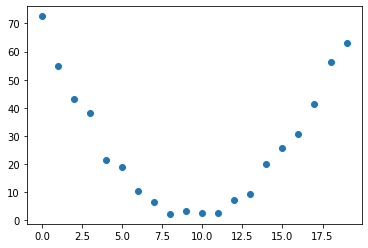

In [213]:
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + .75*(time-9.5)**2 + 1

plt.scatter(time, speed)
plt.show()

In [305]:
def mse(target, pred):
    return ((pred-target)**2).mean()

def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [266]:
params = torch.randn(3).requires_grad_()

In [267]:
preds = f(time, params)

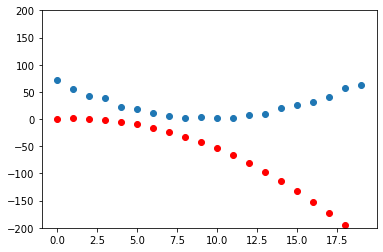

In [268]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-200, 200)

show_preds(preds)

In [279]:
loss = mse(speed, preds)
loss.backward()

params.grad

tensor([-3370.3184,  -196.8414,   -29.5121])

In [280]:
params.data -= lr*params.grad
params.grad = None

In [278]:
preds = f(time, params)

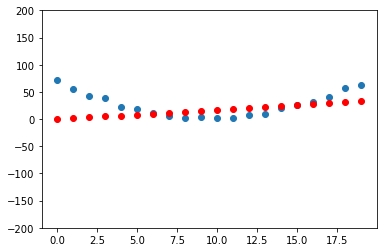

In [281]:
# second step
preds = f(time, params)
show_preds(preds)

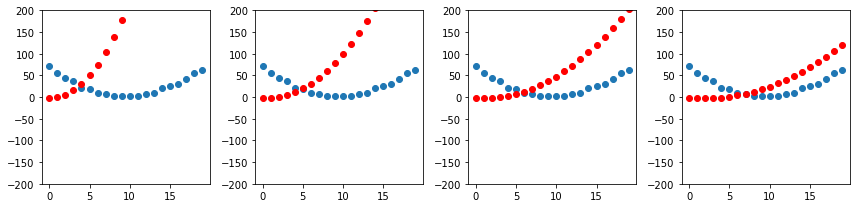

In [309]:
def apply_step(params,lr=1e-5, prn=True):
    preds = f(time, params)
    loss = mse(speed, preds)
    loss.backward()
    params.data -= params.grad * lr
    params.grad = None
    if prn: print('loss: {}'.format(loss.item()))
    return preds

params = torch.randn(3).requires_grad_()

_, axs = plt.subplots(1, 4, figsize=(12,3))

for ax in axs: show_preds(apply_step(params, prn=False), ax=ax)
plt.tight_layout()


# Using SGD for MNIST

In [315]:
# concatenate all images and flatten to become 784 columns by 12396 rows
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [321]:
# we use unsqueeze to make the y as a rank-2 instead of rank-0 tensor
train_y = torch.tensor(len(threes)*[1] + len(sevens)*[0]).unsqueeze(1)

In [323]:
dataset = list(zip(train_x, train_y))
x, y = dataset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [328]:
valid_x = torch.cat([valid_3_tensor, valid_7_tensor]).view(-1, 28*28)
valid_y = torch.tensor(valid_3_tensor.shape[0] * [1] + valid_7_tensor.shape[0] * [0])
valid_dataset = list(zip(valid_x, valid_y))

In [341]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

weights = init_params(28*28)
bias = init_params(1)

In [353]:
def linear1(xb):
    return xb@weights + bias

preds = linear1(train_x) # or simply train_x@weights + bias
preds

tensor([ -9.5715, -11.2772,  -9.4771,  ...,   8.5544, -11.2808,  -0.5879],
       grad_fn=<AddBackward0>)

In [357]:
# accuracy 'is 3'
(preds > 0.).float().mean()

tensor(0.1635)

# my try to optimize (linear regression with pytorch)

In [394]:
def linear2(xb):
    return (torch.sigmoid((xb@weights) + bias)).float().unsqueeze(1)

preds = linear2(train_x)

In [ ]:
def loss1(preds, target):
    return torch.where(target == 1, 1-preds, preds).mean()

def my_loss(pred, target)
    return F.binary_cross_entropy(preds, target.float())

In [405]:
def SGD(weights, bias, it, lr=1e-3, prn=True):
    
    def _update(param):
        param.data = param - param.grad * lr
        param.grad = None
    
    preds = linear2(train_x)
    loss = 
    loss.backward()
    _update(weights)
    _update(bias)
    
    if not it%prn: print("CrossEntropyLoss: {}".format(loss.item()))
    
    return preds

weights = init_params(28*28)
bias = init_params(1)

for i in range(1000):
    SGD(weights, bias, i, lr=1e-2, prn=50)

CrossEntropyLoss: 3.86753511428833
CrossEntropyLoss: 2.7571544647216797
CrossEntropyLoss: 2.0759453773498535
CrossEntropyLoss: 1.669029951095581
CrossEntropyLoss: 1.4027055501937866
CrossEntropyLoss: 1.218564510345459
CrossEntropyLoss: 1.063765048980713
CrossEntropyLoss: 0.9514778852462769
CrossEntropyLoss: 0.8522312045097351
CrossEntropyLoss: 0.7738466262817383
CrossEntropyLoss: 0.7061665654182434
CrossEntropyLoss: 0.6531568765640259
CrossEntropyLoss: 0.606289267539978
CrossEntropyLoss: 0.5641611814498901
CrossEntropyLoss: 0.5259830355644226
CrossEntropyLoss: 0.5043594837188721
CrossEntropyLoss: 0.48527976870536804
CrossEntropyLoss: 0.4683549106121063
CrossEntropyLoss: 0.4532194435596466
CrossEntropyLoss: 0.4395400881767273


In [406]:
preds = SGD(weights, bias, 0)

CrossEntropyLoss: 0.4272018074989319


In [407]:
((preds > .5).int() == train_y).float().mean()

tensor(0.9134)